In [89]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm as tqdm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree
import pydotplus

In [2]:
PATH = '../BBCSports/bbcsport-fulltext-asis/bbcsport/'
classes = os.listdir(PATH)
classes.remove('README.TXT')

In [3]:
print(classes)

['athletics', 'cricket', 'football', 'rugby', 'tennis']


In [4]:
print("There are {} classes present for the BBC sports dataset".format(len(classes)))

There are 5 classes present for the BBC sports dataset


In [5]:
classes

['athletics', 'cricket', 'football', 'rugby', 'tennis']

In [6]:
PATH+classes[0]

'../BBCSports/bbcsport-fulltext-asis/bbcsport/athletics'

In [7]:
class_data = os.listdir(PATH+classes[0])

In [8]:
class_data[2]

'003.txt'

In [9]:
len(class_data)

101

In [10]:
PATH+classes[0]+"/"+class_data[0]

'../BBCSports/bbcsport-fulltext-asis/bbcsport/athletics/001.txt'

In [11]:
file1 = open(PATH+classes[0]+"/"+class_data[0],"r")

In [12]:
file1.read()

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [13]:
text_list = []
class_list = []
class_num = []
for SPORT in tqdm(classes):
    for FILE_NAME in os.listdir(PATH+SPORT):
        file1 = open(PATH+SPORT+"/"+FILE_NAME,"r")
        text_list.append(file1.read())
        class_list.append(SPORT)
        class_num.append(classes.index(SPORT))

In [14]:
print("Length of Text Data : ", len(text_list))
print("Length of Class Data : ", len(class_list))
print("Length of Number Class Data : ", len(class_num))

Length of Text Data :  737
Length of Class Data :  737
Length of Number Class Data :  737


In [15]:
data_dict = {'Text':text_list,'Category':class_list, 'Class': class_num}
data  = pd.DataFrame(data_dict)

In [16]:
data.head()

,Text,Category,Class
0,Claxton hunting first major medal\n\nBritish h...,athletics,0
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,0
2,Greene sets sights on world title\n\nMaurice G...,athletics,0
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,0
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,0


In [17]:
data.iloc[101:110]

,Text,Category,Class
101,Hayden sets up Australia win\n\nSecond one-day...,cricket,1
102,Pietersen gives England a chance\n\nLunch: Eng...,cricket,1
103,South Africa far too strong again\n\nSecond on...,cricket,1
104,Pakistan on revenge mission\n\nPakistan's cric...,cricket,1
105,Russell to instruct keeper Jones\n\nFormer Eng...,cricket,1
106,England A roll to second victory\n\nOne-day to...,cricket,1
107,Kaif absence wrong - Azharuddin\n\nIndia were ...,cricket,1
108,Bracewell worried by Lee\n\nNew Zealand coach ...,cricket,1
109,Pakistan accept venues compromise\n\nThe doubt...,cricket,1


In [18]:
data.iloc[225:235]

,Text,Category,Class
225,Man Utd stroll to Cup win\n\nWayne Rooney made...,football,2
226,Van Nistelrooy set to return\n\nManchester Uni...,football,2
227,Moyes U-turn on Beattie dismissal\n\nEverton m...,football,2
228,Ronaldo considering new contract\n\nManchester...,football,2
229,Smith keen on Home series return\n\nScotland m...,football,2
230,Mido makes third apology\n\nAhmed 'Mido' Hossa...,football,2
231,Man City 0-2 Man Utd\n\nManchester United redu...,football,2
232,Gerrard plays down European hopes\n\nSteven Ge...,football,2
233,Duff ruled out of Barcelona clash\n\nChelsea's...,football,2
234,Chelsea clinch cup in extra-time\n\n(after ext...,football,2


In [19]:
data.iloc[490:500]

,Text,Category,Class
490,Hodgson shoulders England blame\n\nFly-half Ch...,rugby,3
491,Vickery out of Six Nations\n\nEngland tight-he...,rugby,3
492,Yachvili savours France comeback\n\nFrance scr...,rugby,3
493,Laporte tinkers with team\n\nFrance coach Bern...,rugby,3
494,Lewsey puzzle over disallowed try\n\nEngland's...,rugby,3
495,Fuming Robinson blasts officials\n\nEngland co...,rugby,3
496,O'Gara revels in Ireland victory\n\nIreland fl...,rugby,3
497,Thomas out of Six Nations\n\nWales captain Gar...,rugby,3
498,Wales coach elated with win\n\nMike Ruddock pa...,rugby,3
499,Newcastle 27-27 Gloucester\n\nNewcastle centre...,rugby,3


In [20]:
data.iloc[637:647]

,Text,Category,Class
637,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis,4
638,Safin slumps to shock Dubai loss\n\nMarat Safi...,tennis,4
639,Ferrero eyes return to top form\n\nFormer worl...,tennis,4
640,Roddick into San Jose final\n\nAndy Roddick wi...,tennis,4
641,Federer claims Dubai crown\n\nWorld number one...,tennis,4
642,Young debut cut short by Ginepri\n\nFifteen-ye...,tennis,4
643,Melzer shocks Agassi\n\nSecond seed Andre Agas...,tennis,4
644,Federer forced to dig deep\n\nTop seed Roger F...,tennis,4
645,Nadal marches on in Mexico\n\nRafael Nadal con...,tennis,4
646,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis,4


In [21]:
data['Category'].value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: Category, dtype: int64

In [22]:
data['Class'].value_counts()

2    265
3    147
1    124
0    101
4    100
Name: Class, dtype: int64

In [23]:
data.iloc[0,0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [24]:
print(data.iloc[0,0])
print(100*'=')
print(data.iloc[100,0])
print(100*'=')
print(data.iloc[200,0])
print(100*'=')
print(data.iloc[300,0])
print(100*'=')

Claxton hunting first major medal

British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.

The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.

For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous seasons,

In [25]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"shan't", "shall not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase


In [26]:
stopWords = set(stopwords.words('english'))

In [27]:
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
# stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
# "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
# 'himself', \
# 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
# 'their',\
# 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
# 'these', 'those', \
# 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
# 'do', 'does', \
# 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
# 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
# 'before', 'after',\
# 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under'
# , 'again', 'further',\
# 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
# 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
# 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll'
# , 'm', 'o', 're', \
# 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
# "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
# "mightn't", 'mustn',\
# "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
# "wasn't", 'weren', "weren't", \
# 'won', "won't", 'wouldn', "wouldn't"])


In [29]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

porter = PorterStemmer()
preprocessed_data = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Text'].values):

#     sentance = decontracted(sentance)
    #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(porter.stem(e.lower()) for e in sentance.split() if e.lower() not in stopWords)
    preprocessed_data.append(sentance.strip())


### Before Stemming

In [30]:
data['Text'][0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

### After Stemming 

In [31]:
preprocessed_data[0]

'claxton hunt first major medal british hurdler sarah claxton confid win first major medal next month european indoor championship madrid alreadi smash british record hurdl twice season set new mark second win aaa titl quit confid said claxton take race come long keep train much think chanc medal claxton nation hurdl titl past three year struggl translat domest success intern stage scotland born athlet own equal fifth fastest time world year last week birmingham grand prix claxton left european medal favourit russian irina shevchenko trail sixth spot first time claxton prepar campaign hurdl could explain leap form previou season also contest long jump sinc move colchest london focus attent claxton see new train regim pay dividend european indoor take place march'

In [32]:
data['preprocessed_data'] = preprocessed_data

In [33]:
data.head()

,Text,Category,Class,preprocessed_data
0,Claxton hunting first major medal\n\nBritish h...,athletics,0,claxton hunt first major medal british hurdler...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,0,sullivan could run world sonia sullivan indic ...
2,Greene sets sights on world title\n\nMaurice G...,athletics,0,green set sight world titl mauric green aim wi...
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,0,iaaf launch fight drug iaaf athlet world gover...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,0,dibaba break world record ethiopia tirunesh di...


In [34]:
data.iloc[101:110]

,Text,Category,Class,preprocessed_data
101,Hayden sets up Australia win\n\nSecond one-day...,cricket,1,hayden set australia win second one day intern...
102,Pietersen gives England a chance\n\nLunch: Eng...,cricket,1,pietersen give england chanc lunch england ove...
103,South Africa far too strong again\n\nSecond on...,cricket,1,south africa far strong second one day intern ...
104,Pakistan on revenge mission\n\nPakistan's cric...,cricket,1,pakistan reveng mission pakistan cricket depar...
105,Russell to instruct keeper Jones\n\nFormer Eng...,cricket,1,russel instruct keeper jone former england glo...
106,England A roll to second victory\n\nOne-day to...,cricket,1,england roll second victori one day tour match...
107,Kaif absence wrong - Azharuddin\n\nIndia were ...,cricket,1,kaif absenc wrong azharuddin india wrong leav ...
108,Bracewell worried by Lee\n\nNew Zealand coach ...,cricket,1,bracewel worri lee new zealand coach john brac...
109,Pakistan accept venues compromise\n\nThe doubt...,cricket,1,pakistan accept venu compromis doubt surround ...


In [35]:
data.iloc[225:235]

,Text,Category,Class,preprocessed_data
225,Man Utd stroll to Cup win\n\nWayne Rooney made...,football,2,man utd stroll cup win wayn rooney made win re...
226,Van Nistelrooy set to return\n\nManchester Uni...,football,2,van nistelrooy set return manchest unit strike...
227,Moyes U-turn on Beattie dismissal\n\nEverton m...,football,2,moy u turn beatti dismiss everton manag david ...
228,Ronaldo considering new contract\n\nManchester...,football,2,ronaldo consid new contract manchest unit wing...
229,Smith keen on Home series return\n\nScotland m...,football,2,smith keen home seri return scotland manag wal...
230,Mido makes third apology\n\nAhmed 'Mido' Hossa...,football,2,mido make third apolog ahm mido hossam made an...
231,Man City 0-2 Man Utd\n\nManchester United redu...,football,2,man citi man utd manchest unit reduc chelsea p...
232,Gerrard plays down European hopes\n\nSteven Ge...,football,2,gerrard play european hope steven gerrard admi...
233,Duff ruled out of Barcelona clash\n\nChelsea's...,football,2,duff rule barcelona clash chelsea damien duff ...
234,Chelsea clinch cup in extra-time\n\n(after ext...,football,2,chelsea clinch cup extra time extra time score...


In [36]:
data['Category'].value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: Category, dtype: int64

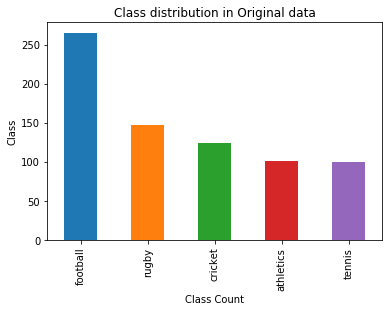

In [37]:
import matplotlib.pyplot as plt
data['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Original data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X, X_test = train_test_split(data, test_size=0.05, random_state=42)
X_train, X_val = train_test_split(X, test_size=0.05, random_state=42)

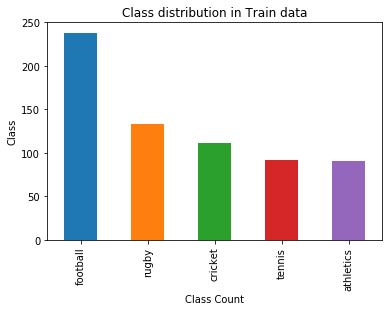

In [39]:
X_train['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Train data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

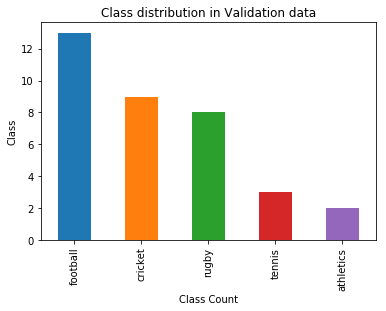

In [40]:
X_val['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Validation data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

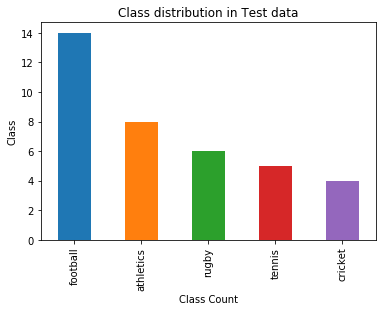

In [41]:
X_test['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Test data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

In [42]:
print("Shape of Train Data      : ",X_train.shape)
print("Shape of Validation Data : ",X_val.shape)
print("Shape of Test Data       : ",X_test.shape)

Shape of Train Data      :  (665, 4)
Shape of Validation Data :  (35, 4)
Shape of Test Data       :  (37, 4)


In [43]:
#BoW
count_vect = CountVectorizer(max_df = 70, min_df = 10, max_features = 3000) #in scikit-learn
count_vect.fit(X_train['preprocessed_data'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
final_counts = count_vect.transform(X_train['preprocessed_data'])
final_cv = count_vect.transform(X_val['preprocessed_data'])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])


some feature names  ['aaa', 'ab', 'abdul', 'abil', 'abl', 'absenc', 'absolut', 'ac', 'accept', 'accid']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (665, 1463)
the number of unique words  1463


In [44]:
print(count_vect.get_feature_names())

['aaa', 'ab', 'abdul', 'abil', 'abl', 'absenc', 'absolut', 'ac', 'accept', 'accid', 'accord', 'account', 'accus', 'achiev', 'across', 'act', 'action', 'actual', 'adam', 'add', 'admir', 'advanc', 'advantag', 'affair', 'affect', 'afford', 'africa', 'african', 'afternoon', 'afterward', 'agassi', 'age', 'agenc', 'agent', 'ago', 'agre', 'agreement', 'aim', 'air', 'akhtar', 'akmal', 'alan', 'alex', 'alleg', 'allow', 'almost', 'alon', 'along', 'alongsid', 'although', 'amaz', 'ambit', 'america', 'american', 'among', 'amount', 'anderson', 'andr', 'andrew', 'anfield', 'angl', 'angri', 'ankl', 'announc', 'answer', 'anti', 'antonio', 'anybodi', 'anyon', 'anyth', 'apart', 'apologis', 'appeal', 'appear', 'appli', 'appoint', 'approach', 'april', 'area', 'argentina', 'arm', 'around', 'arriv', 'ash', 'ashley', 'asid', 'ask', 'assess', 'assist', 'associ', 'assur', 'aston', 'athen', 'athlet', 'atmospher', 'attack', 'attempt', 'attend', 'attent', 'attitud', 'attract', 'august', 'aussi', 'author', 'autumn'

### TF-IDF

In [45]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),max_df = 70, min_df = 10, max_features = 3000)
tf_idf_vect.fit(X_train['preprocessed_data'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf_train = tf_idf_vect.transform(X_train['preprocessed_data'])
final_tf_idf_cv = tf_idf_vect.transform(X_val['preprocessed_data'])
print("the type of count vectorizer ",type(final_tf_idf_train))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_train.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_train.get_shape()[1])

some sample features(unique words in the corpus) ['aaa', 'ab', 'ab de', 'abdul', 'abdul razzaq', 'abil', 'abl', 'absenc', 'absolut', 'ac']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (665, 1863)
the number of unique words including both unigrams and bigrams  1863


In [46]:
print(tf_idf_vect.get_feature_names())

['aaa', 'ab', 'ab de', 'abdul', 'abdul razzaq', 'abil', 'abl', 'absenc', 'absolut', 'ac', 'ac milan', 'accept', 'accid', 'accord', 'account', 'accus', 'achiev', 'across', 'act', 'action', 'actual', 'adam', 'adam gilchrist', 'add', 'admir', 'advanc', 'advantag', 'affair', 'affect', 'afford', 'africa', 'african', 'afternoon', 'afterward', 'agassi', 'age', 'agenc', 'agent', 'ago', 'agre', 'agreement', 'aim', 'air', 'akhtar', 'akmal', 'alan', 'alex', 'alex ferguson', 'alleg', 'allow', 'almost', 'alon', 'along', 'alongsid', 'also play', 'also reveal', 'although', 'amaz', 'ambit', 'america', 'american', 'among', 'amount', 'anderson', 'andi robinson', 'andi roddick', 'andr', 'andr agassi', 'andrew', 'andrew flintoff', 'andrew strauss', 'anfield', 'angl', 'angri', 'ankl', 'ankl injuri', 'announc', 'answer', 'anti', 'anti dope', 'antonio', 'anybodi', 'anyon', 'anyth', 'apart', 'apologis', 'appeal', 'appear', 'appli', 'appoint', 'approach', 'april', 'area', 'argentina', 'arm', 'around', 'arriv',

# Applying Model

### Random Forest :

In [123]:
max_depth = [1,5,10,50,500,1000]
n_estimators = [5,10,100,500]

# Train on Unigram Data

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [125]:
def learning_best_hyperparameter(train_data, cv_data):
    train_accuracy = np.zeros((len(max_depth), len(n_estimators)))
    val_accuracy = np.zeros((len(max_depth), len(n_estimators)))
    train_loss = np.zeros((len(max_depth), len(n_estimators)))
    val_loss = np.zeros((len(max_depth), len(n_estimators)))
    for depth in tqdm(range(len(max_depth))):
        for estimator in range(len(n_estimators)):
            model = RandomForestClassifier(max_depth=max_depth[depth], n_estimators = n_estimators[estimator])
            model.fit(train_data, X_train['Class'].values)
            predicted_classes = model.predict(train_data)
            predicted_val_classes = model.predict(cv_data)
            accuracy_train = accuracy_score(X_train['Class'].values.flatten(),predicted_classes)
            accuracy_cv = accuracy_score(X_val['Class'].values.flatten(),predicted_val_classes)
            train_accuracy[depth][estimator] = accuracy_train
            val_accuracy[depth][estimator] = accuracy_cv
            train_loss[depth][estimator] = 1 - accuracy_train
            val_loss[depth][estimator] = 1 - accuracy_cv
    return train_accuracy, val_accuracy, train_loss, val_loss

In [126]:
train_accuracy, val_accuracy, train_loss, val_loss = learning_best_hyperparameter(final_counts, final_cv)

## Graph

In [127]:
def plot_graph(train, val, title_train, title_val):
    df_train = pd.DataFrame(train, columns = n_estimators, index = max_depth)
    df_val = pd.DataFrame(val, columns = n_estimators, index = max_depth)
    sns.heatmap(df_train, annot = True, fmt = "g", cmap = "viridis")
    plt.xlabel('Sample Split')
    plt.ylabel('Depth')
    plt.title(title_train)
    plt.show()
    
    sns.heatmap(df_val, annot = True, fmt = "g", cmap = "viridis")
    plt.xlabel('Sample Split')
    plt.ylabel('Depth')
    plt.title(title_val)
    plt.show()

### Accuracy Graph 

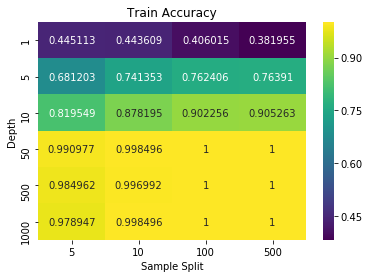

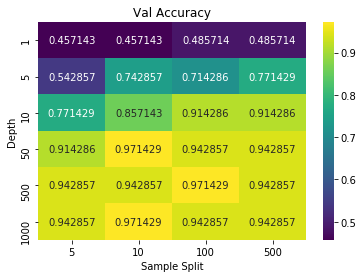

In [128]:
plot_graph(train_accuracy, val_accuracy, "Train Accuracy", "Val Accuracy")

### Loss Graph

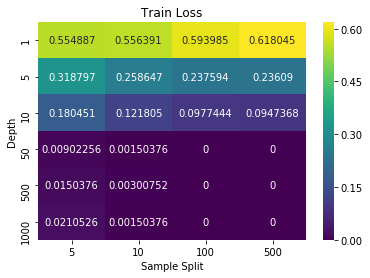

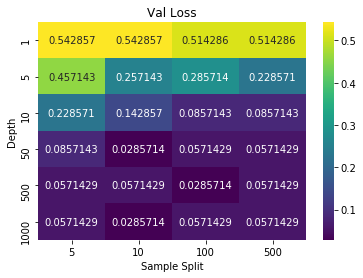

In [129]:
plot_graph(train_loss, val_loss, "Train Loss", "Val Loss")

### Predicting on Test Data

In [130]:
def training_best_model(max_depth, n_estimators, vectorizer, train):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators = n_estimators)
    model.fit(train, X_train['Class'].values)
    predicted_test_classes = model.predict(vectorizer.transform(X_test['preprocessed_data']))
    predicted_category = [classes[index] for index in predicted_test_classes]
    accuracy = accuracy_score(X_test['Class'].values.flatten(),predicted_test_classes)
    return model, predicted_test_classes, predicted_category, accuracy

In [134]:
model, predicted_test_classes, predicted_category, accuracy = training_best_model(50, 100, count_vect, final_counts)

In [135]:
print("number of decision trees created : ",len(model.estimators_))

number of decision trees created :  100


In [136]:
print("Getting {} % Accuracy on test Data".format(round(accuracy*100,2)) )

Getting 97.3 % Accuracy on test Data


### Confusion Matrix

In [137]:
print(classification_report(X_test['Class'].values.flatten(),predicted_test_classes))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00         4
          2       0.93      1.00      0.97        14
          3       1.00      0.83      0.91         6
          4       1.00      1.00      1.00         5

avg / total       0.97      0.97      0.97        37



In [138]:
import itertools
# Plotting Confusion matrix to know How much data is correctly and incorrectly predicted by our model.

def plot_confusion_matrix(cm, classes=['athletics', 'cricket', 'football', 'rugby', 'tennis'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [139]:
X_test['Category'].value_counts()

football     14
athletics     8
rugby         6
tennis        5
cricket       4
Name: Category, dtype: int64

Confusion matrix, without normalization
Normalized confusion matrix


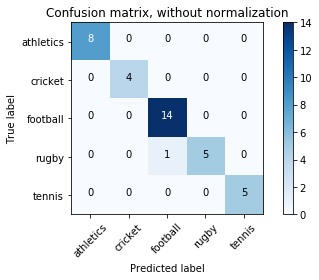

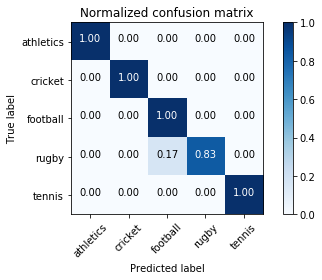

In [140]:
cnf_matrix  = confusion_matrix(X_test['Class'].values.flatten(),predicted_test_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [142]:
def decision_trees_save(clf, iteration, feature_names, target_names):
    file_name = "BBC_"+str(iteration)+"_bow.dot"
    dot_data = export_graphviz(clf, out_file = file_name,feature_names=feature_names, class_names = target_names)
#     print(dot_data)
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     print(graph)
#     graph.write_png(file_name)
    print("Decision tree {} saved as png file".format(iteration+1))

In [143]:
for i in range(len(model.estimators_)):
    decision_trees_save(model.estimators_[i], i, count_vect.get_feature_names(), classes)

Decision tree 1 saved as png file
Decision tree 2 saved as png file
Decision tree 3 saved as png file
Decision tree 4 saved as png file
Decision tree 5 saved as png file
Decision tree 6 saved as png file
Decision tree 7 saved as png file
Decision tree 8 saved as png file
Decision tree 9 saved as png file
Decision tree 10 saved as png file
Decision tree 11 saved as png file
Decision tree 12 saved as png file
Decision tree 13 saved as png file
Decision tree 14 saved as png file
Decision tree 15 saved as png file
Decision tree 16 saved as png file
Decision tree 17 saved as png file
Decision tree 18 saved as png file
Decision tree 19 saved as png file
Decision tree 20 saved as png file
Decision tree 21 saved as png file
Decision tree 22 saved as png file
Decision tree 23 saved as png file
Decision tree 24 saved as png file
Decision tree 25 saved as png file
Decision tree 26 saved as png file
Decision tree 27 saved as png file
Decision tree 28 saved as png file
Decision tree 29 saved as png

In [144]:
test_data_result = pd.DataFrame({'Text':X_test['preprocessed_data'],'Category':predicted_category})

In [145]:
test_data_result.head()

,Text,Category
669,johansson take adelaid victori second seed joa...,tennis
33,athen memori soar low well goodby anoth olymp ...,athletics
549,england coach face rap row england coach andi ...,rugby
199,new zealand step secur new zealand cricket off...,cricket
264,irish finish home game republ ireland manag br...,football


In [146]:
X_test['Unigram_Predicted_Test'] = predicted_test_classes
X_test['Unigram_Predicted_Test_Category'] = predicted_category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [147]:
X_test.head()

,Text,Category,Class,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category
669,Johansson takes Adelaide victory\n\nSecond see...,tennis,4,johansson take adelaid victori second seed joa...,4,tennis
33,"Athens memories soar above lows\n\nWell, it's ...",athletics,0,athen memori soar low well goodby anoth olymp ...,0,athletics
549,England coach faces rap after row\n\nEngland c...,rugby,3,england coach face rap row england coach andi ...,3,rugby
199,New Zealand to step up security\n\nNew Zealand...,cricket,1,new zealand step secur new zealand cricket off...,1,cricket
264,Irish finish with home game\n\nRepublic of Ire...,football,2,irish finish home game republ ireland manag br...,2,football


In [148]:
X_test_not_equal = X_test[X_test['Class'] != X_test['Unigram_Predicted_Test']]

In [149]:
print("Shape of Wrong Data : ",X_test_not_equal.shape)

Shape of Wrong Data :  (1, 6)


In [150]:
X_test_not_equal

,Text,Category,Class,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category
609,Bath faced with Tindall ultimatum\n\nMike Tind...,rugby,3,bath face tindal ultimatum mike tindal agent w...,2,football


In [151]:
test_data_result = pd.DataFrame({'Text':X_test['Text'], 'Pre-Processed Text':X_test['preprocessed_data'], 'Actual Category':X_test['Category'], 'Predicted Category':X_test['Unigram_Predicted_Test_Category']})

In [152]:
test_data_result.to_csv('test_result_bow_unigram_rf.csv')

### Predicting on Future Unseen Text Data

In [153]:
PATH = '../BBCSports/bbcsport-fulltext-single/data/'

In [154]:
def testing_data(path, model, vectorizer):
    test_files = os.listdir(path)
    test_files.remove('.ipynb_checkpoints')
    test_data = []
    for FILE_NAME in test_files:
        file1 = open(path+FILE_NAME,"r")
        test_data.append(file1.read())
    preprocessed_data_test = []
    # tqdm is for printing the status bar
    for sentance in tqdm(test_data):

    #     sentance = decontracted(sentance)
        #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(porter.stem(e.lower()) for e in sentance.split() if e.lower() not in stopWords)
        preprocessed_data_test.append(sentance.strip())
    predicted_on_unseen_classes = model.predict(vectorizer.transform(preprocessed_data_test))
    predicted_category = [classes[index] for index in predicted_on_unseen_classes]
    data_dict_test = {'Text':test_data,'Category':predicted_category}
    data_test  = pd.DataFrame(data_dict_test)
    return data_test

In [155]:
result_unseen_data_test = testing_data(PATH, model, count_vect)

In [156]:
result_unseen_data_test.head()

,Text,Category
0,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis
1,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis
2,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
3,Hayden sets up Australia win\n\nSecond one-day...,cricket
4,Pietersen gives England a chance\n\nLunch: Eng...,cricket


In [157]:
result_unseen_data_test.to_csv('result_bow_unigram_rf.csv')

## Train on TF-IDF data

In [158]:
train_accuracy, val_accuracy, train_loss, val_loss = learning_best_hyperparameter(final_tf_idf_train, final_tf_idf_cv)

### Accuracy Graph

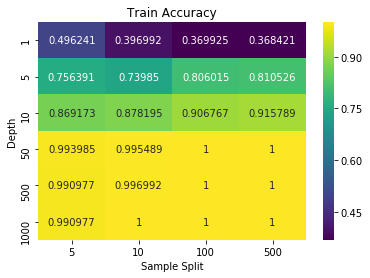

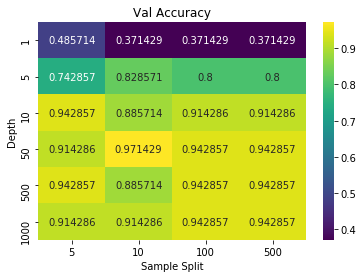

In [159]:
plot_graph(train_accuracy, val_accuracy, "Train Accuracy", "Val Accuracy")

### Loss Graph

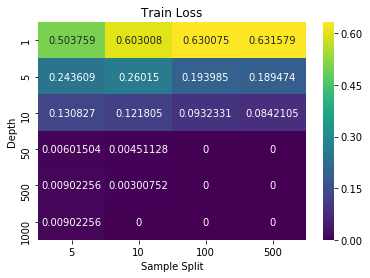

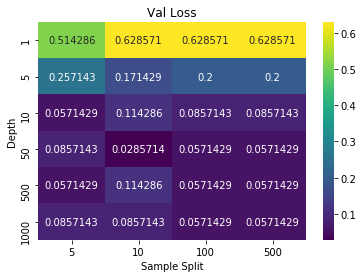

In [160]:
plot_graph(train_loss, val_loss, "Train Loss", "Val Loss")

### Predicting on Test Data

In [161]:
model, predicted_test_classes, predicted_category, accuracy = training_best_model(50, 100, tf_idf_vect, final_tf_idf_train)

In [162]:
print("Getting {} % Accuracy on test Data".format(round(accuracy*100,2)) )

Getting 97.3 % Accuracy on test Data


In [163]:
print(classification_report(X_test['Class'].values.flatten(),predicted_test_classes))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00         4
          2       0.93      1.00      0.97        14
          3       1.00      0.83      0.91         6
          4       1.00      1.00      1.00         5

avg / total       0.97      0.97      0.97        37



Confusion matrix, without normalization
Normalized confusion matrix


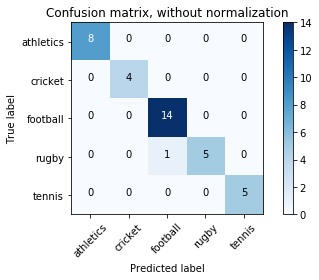

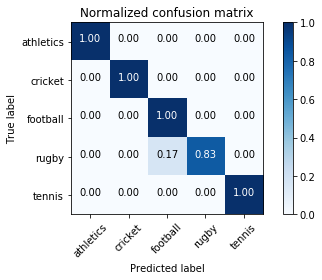

In [164]:
cnf_matrix  = confusion_matrix(X_test['Class'].values.flatten(),predicted_test_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [173]:
def decision_trees_save_tf_idf(clf, iteration, feature_names, target_names):
    file_name = "BBC_"+str(iteration)+"_tfidf.dot"
    dot_data = export_graphviz(clf, out_file = file_name,feature_names=feature_names, class_names = target_names)
#     print(dot_data)
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     print(graph)
#     graph.write_png(file_name)
    print("Decision tree {} saved as png file".format(iteration+1))

In [174]:
for i in range(len(model.estimators_)):
    decision_trees_save_tf_idf(model.estimators_[i], i, tf_idf_vect.get_feature_names(), classes)

Decision tree 1 saved as png file
Decision tree 2 saved as png file
Decision tree 3 saved as png file
Decision tree 4 saved as png file
Decision tree 5 saved as png file
Decision tree 6 saved as png file
Decision tree 7 saved as png file
Decision tree 8 saved as png file
Decision tree 9 saved as png file
Decision tree 10 saved as png file
Decision tree 11 saved as png file
Decision tree 12 saved as png file
Decision tree 13 saved as png file
Decision tree 14 saved as png file
Decision tree 15 saved as png file
Decision tree 16 saved as png file
Decision tree 17 saved as png file
Decision tree 18 saved as png file
Decision tree 19 saved as png file
Decision tree 20 saved as png file
Decision tree 21 saved as png file
Decision tree 22 saved as png file
Decision tree 23 saved as png file
Decision tree 24 saved as png file
Decision tree 25 saved as png file
Decision tree 26 saved as png file
Decision tree 27 saved as png file
Decision tree 28 saved as png file
Decision tree 29 saved as png

In [175]:
X_test['TFIDF_Predicted_Test'] = predicted_test_classes
X_test['TFIDF_Predicted_Test_Category'] = predicted_category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [176]:
X_test.head()

,Text,Category,Class,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
669,Johansson takes Adelaide victory\n\nSecond see...,tennis,4,johansson take adelaid victori second seed joa...,4,tennis,4,tennis
33,"Athens memories soar above lows\n\nWell, it's ...",athletics,0,athen memori soar low well goodby anoth olymp ...,0,athletics,0,athletics
549,England coach faces rap after row\n\nEngland c...,rugby,3,england coach face rap row england coach andi ...,3,rugby,3,rugby
199,New Zealand to step up security\n\nNew Zealand...,cricket,1,new zealand step secur new zealand cricket off...,1,cricket,1,cricket
264,Irish finish with home game\n\nRepublic of Ire...,football,2,irish finish home game republ ireland manag br...,2,football,2,football


In [177]:
X_test_not_equal = X_test[X_test['Class'] != X_test['TFIDF_Predicted_Test']]

In [178]:
print("Shape of Wrong Data : ",X_test_not_equal.shape)

Shape of Wrong Data :  (1, 8)


In [179]:
X_test_not_equal.head()

,Text,Category,Class,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
609,Bath faced with Tindall ultimatum\n\nMike Tind...,rugby,3,bath face tindal ultimatum mike tindal agent w...,2,football,2,football


In [180]:
test_data_result = pd.DataFrame({'Text':X_test['Text'], 'Pre-Processed Text':X_test['preprocessed_data'], 'Actual Category':X_test['Category'], 'Predicted Category':X_test['TFIDF_Predicted_Test_Category']})

In [181]:
test_data_result

,Text,Pre-Processed Text,Actual Category,Predicted Category
669,Johansson takes Adelaide victory\n\nSecond see...,johansson take adelaid victori second seed joa...,tennis,tennis
33,"Athens memories soar above lows\n\nWell, it's ...",athen memori soar low well goodby anoth olymp ...,athletics,athletics
549,England coach faces rap after row\n\nEngland c...,england coach face rap row england coach andi ...,rugby,rugby
199,New Zealand to step up security\n\nNew Zealand...,new zealand step secur new zealand cricket off...,cricket,cricket
264,Irish finish with home game\n\nRepublic of Ire...,irish finish home game republ ireland manag br...,football,football
583,Ireland 17-12 South Africa\n\nRonan O'Gara sco...,ireland south africa ronan gara score ireland ...,rugby,rugby
39,Radcliffe tackles marathon tasks\n\nPaula Radc...,radcliff tackl marathon task paula radcliff fa...,athletics,athletics
554,Owen set for skipper role\n\nWales number eigh...,owen set skipper role wale number eight michae...,rugby,rugby
585,Ireland call up uncapped Campbell\n\nUlster sc...,ireland call uncap campbel ulster scrum half k...,rugby,rugby
609,Bath faced with Tindall ultimatum\n\nMike Tind...,bath face tindal ultimatum mike tindal agent w...,rugby,football


In [182]:
test_data_result.to_csv('test_result_tf_idf_rf.csv')

### Predicting on Future Unseen Text Data

In [183]:
PATH = '../BBCSports/bbcsport-fulltext-single/data/'

In [184]:
result_unseen_data_test = testing_data(PATH, model, tf_idf_vect)

In [185]:
result_unseen_data_test.head()

,Text,Category
0,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis
1,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis
2,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
3,Hayden sets up Australia win\n\nSecond one-day...,cricket
4,Pietersen gives England a chance\n\nLunch: Eng...,cricket


In [186]:
result_unseen_data_test.to_csv('result_tf_idf_rf.csv')

In [187]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Accuracy"]

x.add_row(["BOW", "97.3 %"])
x.add_row(["TF-IDF", "97.3 %"])

print(x)

+--------+----------+
| Model  | Accuracy |
+--------+----------+
|  BOW   |  97.3 %  |
| TF-IDF |  97.3 %  |
+--------+----------+
